# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
## import the packages
import pickle
import csv

import numpy as np
import random

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.contrib.layers import flatten

import time

%matplotlib inline

In [2]:
## Load pickled data
training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
## read the road sign id and name mapping from csv
sign_id_name_mapping = {}
with open("signnames.csv", "r") as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    next(reader, None)   # omit the header
    for row in reader:
        sign_id_name_mapping[int(row[0])] = row[1]

class:  0 - Speed limit (20km/h)
class:  1 - Speed limit (30km/h)
class:  2 - Speed limit (50km/h)
class:  3 - Speed limit (60km/h)
class:  4 - Speed limit (70km/h)
class:  5 - Speed limit (80km/h)
class:  6 - End of speed limit (80km/h)
class:  7 - Speed limit (100km/h)
class:  8 - Speed limit (120km/h)
class:  9 - No passing
class: 10 - No passing for vehicles over 3.5 metric tons
class: 11 - Right-of-way at the next intersection
class: 12 - Priority road
class: 13 - Yield
class: 14 - Stop
class: 15 - No vehicles
class: 16 - Vehicles over 3.5 metric tons prohibited
class: 17 - No entry
class: 18 - General caution
class: 19 - Dangerous curve to the left
class: 20 - Dangerous curve to the right
class: 21 - Double curve
class: 22 - Bumpy road
class: 23 - Slippery road
class: 24 - Road narrows on the right
class: 25 - Road work
class: 26 - Traffic signals
class: 27 - Pedestrians
class: 28 - Children crossing
class: 29 - Bicycles crossing
class: 30 - Beware of ice/snow
class: 31 - Wild an

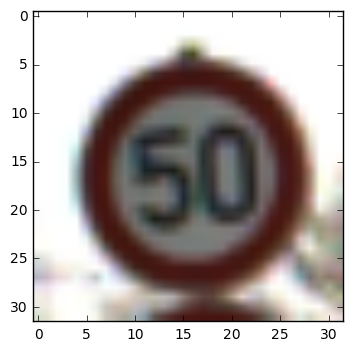

In [4]:
## Do some "shallow" data validation

# assert if length matches
assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

# get the list of classes
for k in sign_id_name_mapping:
    print("class: {0:2d} - {1:s}".format(k, sign_id_name_mapping[k]))
# [(k, sign_id_name_mapping[k]) for k in sign_id_name_mapping]

# get a taste of the image
print()
print(" =======================")
random_img_index = random.randint(0, len(X_train))
print("class: {0:2d} - {1:s}".format(y_train[random_img_index], sign_id_name_mapping[y_train[random_img_index]]))
plt.imshow(X_train[random_img_index])

In [5]:
## further check the image given a class id, for example "16"
def get_one_random_image_for_certain_class(x_data, y_data, class_num = 0):
    images_in_one_class = x_data[np.where(y_data == class_num)]
    print(class_num, len(images_in_one_class))
    return images_in_one_class[random.randint(0, len(images_in_one_class))]    

18 390


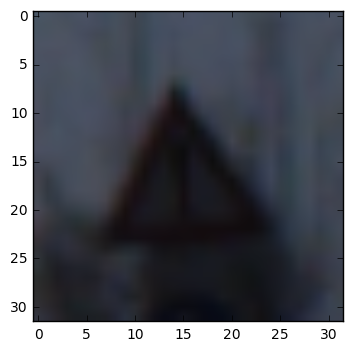

In [6]:
plt.imshow(get_one_random_image_for_certain_class(X_test, y_test, class_num=18))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [7]:
### Replace each question mark with the appropriate value.
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [8]:
# the number of training samples per class
class_numbers_train = np.array([len(y_train[y_train == i]) for i in range(len(np.unique(y_train)))])
class_numbers_test = np.array([len(y_test[y_test == i]) for i in range(len(np.unique(y_test)))])

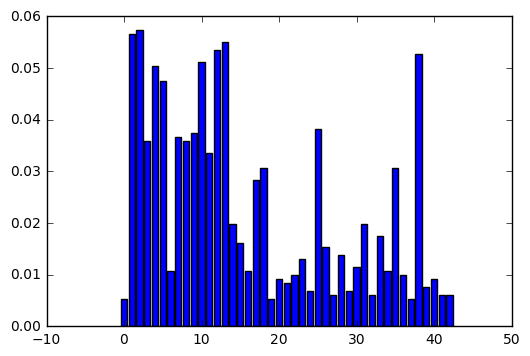

In [9]:
# plot the graph
plt.bar(range(len(np.unique(y_train))), class_numbers_train/float(len(y_train)), align='center')
plt.show()

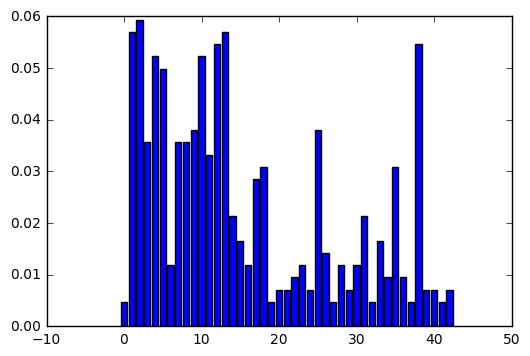

In [10]:
plt.bar(range(len(np.unique(y_train))), class_numbers_test/float(len(y_test)), align='center')
plt.show()

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [14]:
# def show_rand_image(images, labels):
# #     import random
#     index = random.randint(0, len(images))
#     image = images[index]

#     plt.figure(figsize=(1,1))
#     plt.imshow(image)
#     print("label: %s-%s" % (labels[index], sign_id_name_mapping[str(labels[index])]))

# show_rand_image(X_train, y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [16]:
VALIDATION_SET_SPLITTED = False   # set a flag to make sure the validation set only split once. 

In [17]:
## Preprocess -- split the validation set
if not VALIDATION_SET_SPLITTED:
#     from sklearn.model_selection import train_test_split

    print("Training before split: %s" % len(X_train))

    # Get randomized datasets for training and validation
    X_train, X_validation, y_train, y_validation = train_test_split(
        X_train,
        y_train,
        test_size=0.1,
        random_state=832289)

    assert(len(X_train) == len(y_train))
    assert(len(X_validation) == len(y_validation))

    print("Training after split: %s " % len(X_train))
    print("Validation after split: %s " % len(X_validation))
    VALIDATION_SET_SPLITTED = True
else:
    print("Already prepared the validation set.")
    print("Training after split: %s " % len(X_train))
    print("Validation after split: %s " % len(X_validation))

Training before split: 39209
Training after split: 35288 
Validation after split: 3921 


In [18]:
## Preprocess -- shuffle the traing data
X_train, y_train = shuffle(X_train, y_train)
assert(len(X_train) == len(y_train))

In [ ]:

# parametrizae the X_train?? 
# image_gray_operation = tf.squeeze(tf.image.rgb_to_grayscale(X_train))  # can not squeeze here, cause the letnet \ 
# requires the channel, even it's 1
# image_gray_operation_train = tf.image.rgb_to_grayscale(X_train)
# image_gray_operation_validation = tf.image.rgb_to_grayscale(X_validation)
# image_gray_operation_test = tf.image.rgb_to_grayscale(X_test)

In [19]:
t = time.time()

with tf.Session() as sess:
    X_train_gray = sess.run(tf.image.rgb_to_grayscale(X_train))
    X_validation_gray = sess.run(tf.image.rgb_to_grayscale(X_validation))
    X_test_gray = sess.run(tf.image.rgb_to_grayscale(X_test))
    
print("Time Eclipsed: " + str(time.time() - t))

Time Eclipsed: 9.476027965545654


In [20]:
X_train_gray.shape, X_validation_gray.shape, X_test_gray.shape

((35288, 32, 32, 1), (3921, 32, 32, 1), (12630, 32, 32, 1))

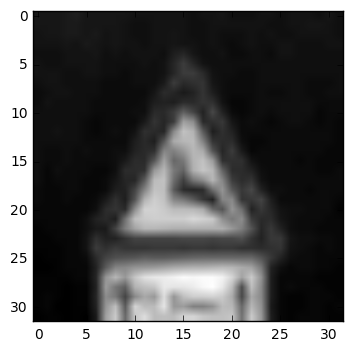

In [21]:
squeezed_gray = np.squeeze(X_train_gray)
plt.imshow(squeezed_gray[0], cmap="gray")

In [22]:
EPOCHS = 10
BATCH_SIZE = 128

In [35]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))   # FIXME, image channel
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # XG: ADD A DROPOUT
#     h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    h_fc1_drop = tf.nn.dropout(fc2, keep_prob)  # the dropout connects to fc2

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
#     logits = tf.matmul(fc2, fc3_W) + fc3_b
    logits = tf.matmul(h_fc1_drop, fc3_W) + fc3_b   # change the fc2 to the dropoutted layer
    
    return logits

In [41]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))   # FIXME, image channel
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)   # defined this 
one_hot_y = tf.one_hot(y, n_classes)

In [42]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [43]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        # during evaluation, using all the neurons
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### the real traing starts here

In [46]:
t = time.time()

validation_accuracy = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_gray)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray, y_train = shuffle(X_train_gray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})  # dropout one half, another paramter can be tunned.
            
        validation_accuracy.append(evaluate(X_validation_gray, y_validation))
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy[i]))
        print()
        
    saver.save(sess, './lenet-dropout-1')     # FIXME, save the point
    print("Model saved")

print()
print("Time Eclippsed: " + str(time.time() - t))

Training...

EPOCH 1 ...
Validation Accuracy = 0.359

EPOCH 2 ...
Validation Accuracy = 0.554

EPOCH 3 ...
Validation Accuracy = 0.694

EPOCH 4 ...
Validation Accuracy = 0.791

EPOCH 5 ...
Validation Accuracy = 0.853

EPOCH 6 ...
Validation Accuracy = 0.896

EPOCH 7 ...
Validation Accuracy = 0.919

EPOCH 8 ...
Validation Accuracy = 0.937

EPOCH 9 ...
Validation Accuracy = 0.935

EPOCH 10 ...
Validation Accuracy = 0.945

Model saved

Time Eclippsed: 203.59937691688538


In [52]:
## run on the test set
# %%timeit
t = time.time()
with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenet-dropout-1')
    test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    print("Time Eclipsed: " + str(time.time() - t))

Test Accuracy = 0.884
Time Eclipsed: 3.6118180751800537


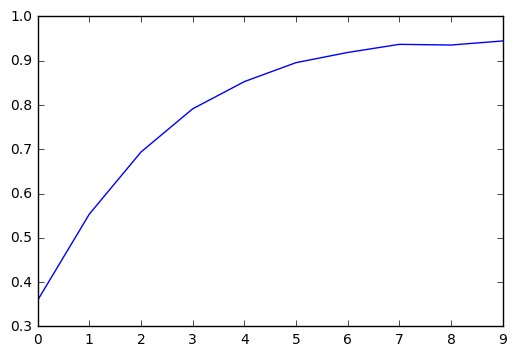

In [53]:
plt.plot(range(10), validation_accuracy)

In [56]:
t = time.time()

EPOCHS = 50

validation_accuracy = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_gray)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray, y_train = shuffle(X_train_gray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        validation_accuracy.append(evaluate(X_validation_gray, y_validation))    
#         validation_accuracy = evaluate(X_validation_gray, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy[i]))
        print()
        
    saver.save(sess, './lenet-dropout-50')     # FIXME, save the point
    print("Model saved")

print()
print("Time Eclipsed: " + str(time.time() - t))

Training...

EPOCH 1 ...
Validation Accuracy = 0.480

EPOCH 2 ...
Validation Accuracy = 0.721

EPOCH 3 ...
Validation Accuracy = 0.812

EPOCH 4 ...
Validation Accuracy = 0.862

EPOCH 5 ...
Validation Accuracy = 0.894

EPOCH 6 ...
Validation Accuracy = 0.914

EPOCH 7 ...
Validation Accuracy = 0.927

EPOCH 8 ...
Validation Accuracy = 0.935

EPOCH 9 ...
Validation Accuracy = 0.939

EPOCH 10 ...
Validation Accuracy = 0.947

EPOCH 11 ...
Validation Accuracy = 0.947

EPOCH 12 ...
Validation Accuracy = 0.955

EPOCH 13 ...
Validation Accuracy = 0.960

EPOCH 14 ...
Validation Accuracy = 0.968

EPOCH 15 ...
Validation Accuracy = 0.969

EPOCH 16 ...
Validation Accuracy = 0.959

EPOCH 17 ...
Validation Accuracy = 0.972

EPOCH 18 ...
Validation Accuracy = 0.975

EPOCH 19 ...
Validation Accuracy = 0.976

EPOCH 20 ...
Validation Accuracy = 0.975

EPOCH 21 ...
Validation Accuracy = 0.975

EPOCH 22 ...
Validation Accuracy = 0.975

EPOCH 23 ...
Validation Accuracy = 0.978

EPOCH 24 ...
Validation Accura

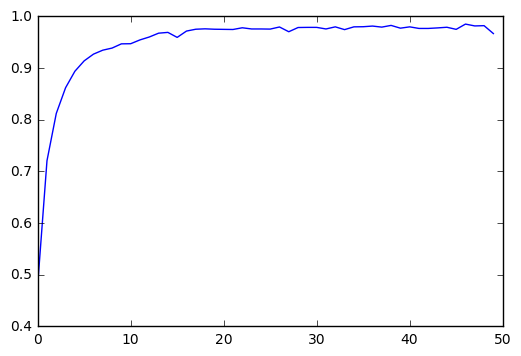

In [57]:
plt.plot(range(50), validation_accuracy)

In [58]:
## run on the test set
t = time.time()
with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenet-dropout-50')
    test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    print("Time Eclipsed: " + str(time.time() - t))

Test Accuracy = 0.903
Time Eclipsed: 3.904690980911255


In [28]:
len(X_validation_gray), len(X_test_gray)

(3921, 12630)

In [29]:
# using the same scale testing volume as validation
with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenet-gray-input-2')
#     validation_sample_range = [:len(X_validation_gray)]
    test_accuracy = evaluate(X_test_gray[:len(X_validation_gray)], y_test[:len(X_validation_gray)])
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Test Accuracy = 0.929


In [38]:
## want to get the predictions
# preditions = tf.arg_max(logits, 1)

predictions = []
real = []

with tf.Session() as sess:
    saver.restore(sess, './lenet-gray-input-2')
    
    X_data = X_test_gray
    y_data = y_test
    num_examples = len(X_data)
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        predictions.extend(sess.run(tf.arg_max(logits, 1), feed_dict={x: batch_x, y: batch_y}))
        real.extend(sess.run(tf.arg_max(one_hot_y, 1), feed_dict={x: batch_x, y: batch_y}))
    print(len(predictions))
    print(len(real))

12630
12630


In [41]:
predictions = np.array(predictions)
real = np.array(real)

In [44]:
predictions[0:10]

array([16,  1, 38, 33, 11, 38, 18, 12, 25, 35])

In [47]:
np.where(np.not_equal(predictions, real))[0].shape

(942,)

In [129]:
len(np.where(np.not_equal(predictions, real)))

1

In [49]:
1 - 942 / float(12630)

0.92541567695962

In [124]:
len(X_test)

12630

### intended to evalue each class, then evaluate the model's performace on each class, hence determine if the unbalance of data distributation has effect on the each class, but why get the result like below?

In [93]:
# accuracy_by_class = []
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    accuracy_by_class = np.array([evaluate(X_test[np.where(y_test==i)], y_test[np.where(y_test==i)]) for i in range(0, n_classes)])

In [101]:
np.where(accuracy_by_class < 0.6)

(array([ 0, 21, 24, 27, 30, 39]),)

30 150


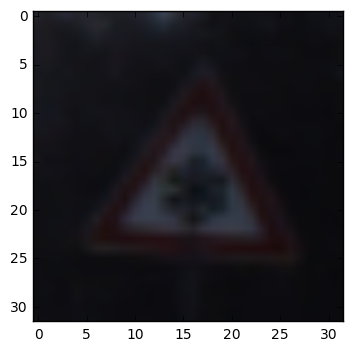

In [102]:
plt.imshow(get_one_random_image_for_certain_class(X_test, y_test, class_num=30))

In [96]:
np.where(accuracy_by_class > 0.85)

(array([ 1,  2,  4,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 23, 25,
        31, 32, 33, 34, 35, 38]),)

17 360


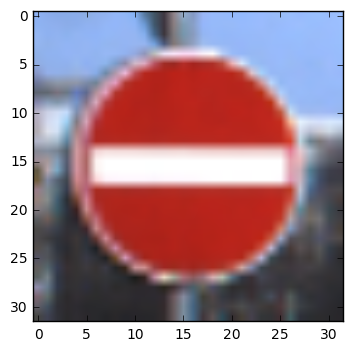

In [99]:
plt.imshow(get_one_random_image_for_certain_class(X_test, y_test, class_num=17))

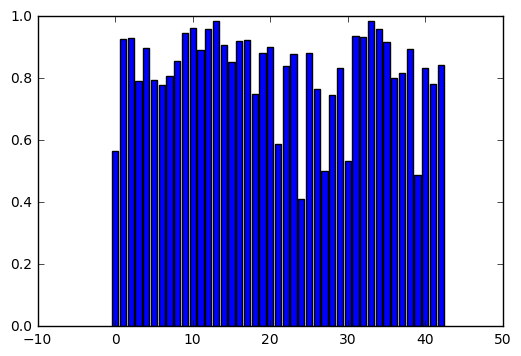

In [67]:
plt.bar(range(len(np.unique(y_train))), accuracy_by_class, align='center')
plt.show()

<Container object of 43 artists>

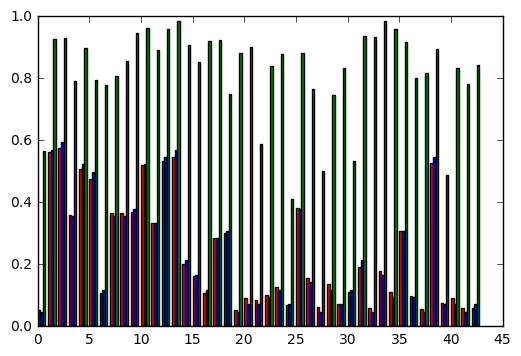

In [87]:
# X_Scale = np.range(n_classes)
plt.bar(np.arange(n_classes), class_numbers_train/float(len(y_train))*10, color='r', width=0.25)
plt.bar(np.arange(n_classes)+0.25, class_numbers_test/float(len(y_test))*10, color='b', width=0.25)
plt.bar(np.arange(n_classes)+0.5, accuracy_by_class, color='g', width=0.25)

In [89]:
# sorted(accuracy_by_class)
accuracy_by_class

[0.56666666269302368,
 0.92638889021343651,
 0.93066666936874387,
 0.79333333015441898,
 0.89848484776236792,
 0.79523809429198977,
 0.77999999920527141,
 0.80888889021343657,
 0.8577777767181396,
 0.9458333333333333,
 0.96363636327512336,
 0.89047619104385378,
 0.96086956659952805,
 0.98611111243565874,
 0.90740740608285975,
 0.85238094159534994,
 0.91999999920527142,
 0.92499999470180938,
 0.74871794871794872,
 0.88333332538604736,
 0.89999997615814209,
 0.58888888359069824,
 0.84166663885116577,
 0.88000000397364297,
 0.41111111640930176,
 0.8833333333333333,
 0.76666666666666672,
 0.5,
 0.74666666746139532,
 0.83333331346511841,
 0.53333333293596907,
 0.937037037037037,
 0.93333333730697632,
 0.98571429025559199,
 0.95833331346511841,
 0.91794871794871791,
 0.80000001192092896,
 0.81666666269302368,
 0.89565217356750926,
 0.48888888955116272,
 0.83333331346511841,
 0.78333336114883423,
 0.84444445371627808]

In [92]:
accuracy_by_class_2

[0.56666666269302368,
 0.92638889021343651,
 0.93066666936874387,
 0.79333333015441898,
 0.89848484776236792,
 0.79523809429198977,
 0.77999999920527141,
 0.80888889021343657,
 0.8577777767181396,
 0.9458333333333333,
 0.96363636327512336,
 0.89047619104385378,
 0.96086956659952805,
 0.98611111243565874,
 0.90740740608285975,
 0.85238094159534994,
 0.91999999920527142,
 0.92499999470180938,
 0.74871794871794872,
 0.88333332538604736,
 0.89999997615814209,
 0.58888888359069824,
 0.84166663885116577,
 0.88000000397364297,
 0.41111111640930176,
 0.8833333333333333,
 0.76666666666666672,
 0.5,
 0.74666666746139532,
 0.83333331346511841,
 0.53333333293596907,
 0.937037037037037,
 0.93333333730697632,
 0.98571429025559199,
 0.95833331346511841,
 0.91794871794871791,
 0.80000001192092896,
 0.81666666269302368,
 0.89565217356750926,
 0.48888888955116272,
 0.83333331346511841,
 0.78333336114883423,
 0.84444445371627808]

In [72]:
class_index = 1

In [73]:
test_class_0 = X_test[y_test[y_test==class_index]]

In [74]:
test_label_class_0 = y_test[y_test == class_index]

In [75]:
len(test_class_0)

720

In [76]:
len(test_label_class_0)

720

In [77]:
len(X_test)

12630

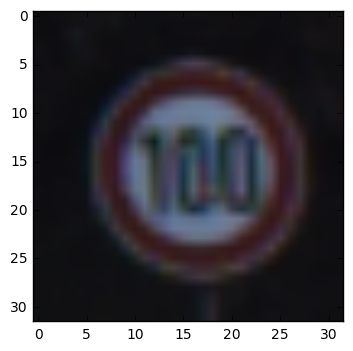

In [68]:
plt.imshow(test_class_0[0])

In [58]:
len()

60

## let's try to change the images

### change the image to grayscale

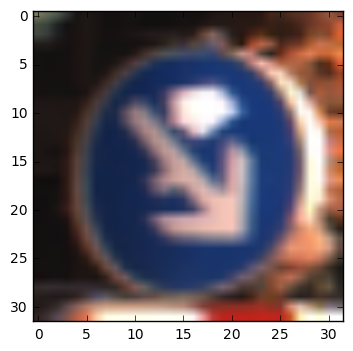

In [134]:
plt.imshow(X_train[0])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [ ]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [ ]:
## want to make class, not sure how it works??? 
## the following code not tested.

In [ ]:
class ConvTrainer:
    
    # define the tensors 
    def __init__(self, x, y, n_classes, 
                 logits, 
#                  loss = tf., 
#                  optimizer, 
#                  training_op, 
#                  cross_entropy=True, 
                 larning_rate=0.001
                epochs = 10):
        self.x = x  # the batch input
        self.y = y  # the batch labels
        self.one_hot_y = tf.one_hot(y, n_classes)
        self.n_classes = n_classes  # the number of classes
        self.logits = logits     # the architecture used to generate the logits
        self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, self.one_hot_y))
        self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        self.correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
        self.accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        self.saver = tf.train.Saver()
        self.epochs = epochs
#         self.training_op = training_op   # the training op
        
#         if cross_entropy:
#             self.cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, self.one_hot_y)

        
    # the training methods
    def train():
        t = time.time()
        validation_accuracy = []
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            num_examples = len(X_train_gray)

            print("Training...")
            print()
            for i in range(EPOCHS):
                X_train_gray, y_train = shuffle(X_train_gray, y_train)
                for offset in range(0, num_examples, BATCH_SIZE):
                    end = offset + BATCH_SIZE
                    batch_x, batch_y = X_train_gray[offset:end], y_train[offset:end]
                    sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})  # dropout one half, another paramter can be tunned.

                validation_accuracy.append(evaluate(X_validation_gray, y_validation))
                print("EPOCH {} ...".format(i+1))
                print("Validation Accuracy = {:.3f}".format(validation_accuracy[i]))
                print()

            saver.save(sess, './checkpoint/lenet-as-is')
            print("Model saved")

        print()
        print("Time Eclippsed: " + str(time.time() - t))
    
    
    def evaluate(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            # during evaluation, using all the neurons
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples
        
        
    
    
    

In [ ]:
def train(x, y, check_point_path):
    t = time.time()

    validation_accuracy = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(x)

        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train_shuffled, y_train_shuffled = shuffle(x, y)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train_shuffled[offset:end], y_train_shuffled[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            validation_accuracy.append(evaluate(X_validation, y_validation))
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy[i]))
            print()

        saver.save(sess, check_point_path)
        print("Model saved")

    print()
    print("Time Eclippsed: " + str(time.time() - t))
    return validation_accuracy